In [2]:
%matplotlib inline

In [4]:
import pickle
import gzip

with gzip.open(('data/mnist.pkl.gz'), 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

(50000, 784)


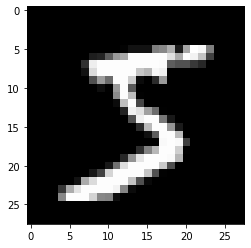

In [5]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape(28, 28), cmap='gray')
print(x_train.shape)

In [6]:
import torch
x_train, y_train, x_valid, y_valid = map(
       torch.tensor, (x_train, y_train, x_valid, y_valid)
)

In [10]:
from torch import nn

class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(28*28, 128)
        self.linear2 = nn.Linear(128, 256)
        self.out = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.out(x)
        
        return x

In [11]:
net = Mnist_NN()
print(net)

Mnist_NN(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)


In [12]:
for name, parameter in net.named_parameters():
    print(name, parameter)

linear1.weight Parameter containing:
tensor([[ 0.0272, -0.0004,  0.0230,  ..., -0.0121, -0.0119,  0.0336],
        [ 0.0173,  0.0136,  0.0253,  ..., -0.0081, -0.0155,  0.0020],
        [ 0.0357,  0.0207,  0.0033,  ..., -0.0240, -0.0191,  0.0012],
        ...,
        [-0.0236, -0.0031, -0.0236,  ...,  0.0049,  0.0196, -0.0140],
        [ 0.0206, -0.0174, -0.0012,  ..., -0.0222,  0.0012, -0.0213],
        [-0.0186,  0.0042, -0.0320,  ..., -0.0299,  0.0313, -0.0162]],
       requires_grad=True)
linear1.bias Parameter containing:
tensor([ 0.0010,  0.0296, -0.0322,  0.0334, -0.0140,  0.0320, -0.0241,  0.0056,
         0.0320, -0.0082,  0.0220,  0.0279,  0.0114, -0.0180, -0.0290, -0.0048,
         0.0163, -0.0149,  0.0157,  0.0176, -0.0142,  0.0280,  0.0013, -0.0127,
        -0.0287, -0.0174,  0.0168, -0.0132, -0.0226, -0.0025, -0.0185,  0.0161,
        -0.0338, -0.0106,  0.0117, -0.0126, -0.0104,  0.0260,  0.0282,  0.0347,
        -0.0274, -0.0002,  0.0122, -0.0077, -0.0151, -0.0060,  0.02

In [13]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

bs = 64

train_ds = TensorDataset(x_train, y_train)
trail_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

valid_ds = TensorDataset(x_valid, y_valid)
valid_dl = DataLoader(valid_ds, batch_size=bs*2)

In [15]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs*2)
    )

In [39]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    return loss.item(), len(xb)

In [17]:
def get_model():
    model = Mnist_NN()
    return model, torch.optim.SGD(model.parameters(), lr=0.001)

In [65]:
import numpy as np

def fit(steps, model, loss_func, opt, train_dl, valid_dl):
    for step in range(steps):
#         model.train()  # ??
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)
            
#         model.eval()
#         print(valid_dl)
        with torch.no_grad():
            losses, nums = zip(
                *[ loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
            
        val_loss = np.sum(np.multiply(losses, nums))/np.sum(nums)
        
        print('cur step: '+ str(step), 'valid loss = ' + str(val_loss))

In [18]:
import torch.nn.functional as F
loss_func = F.cross_entropy

In [66]:
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(25, model, loss_func, opt, trail_dl, valid_dl)

cur step: 0 valid loss = 2.146269161224365
cur step: 1 valid loss = 1.9187297424316405
cur step: 2 valid loss = 1.5988143125534058
cur step: 3 valid loss = 1.2763635175704957
cur step: 4 valid loss = 1.0291409896850585
cur step: 5 valid loss = 0.8570390712738037
cur step: 6 valid loss = 0.7386548881530761
cur step: 7 valid loss = 0.6558200610160828
cur step: 8 valid loss = 0.5956096018791198
cur step: 9 valid loss = 0.5505643909454345
cur step: 10 valid loss = 0.5151873041629791
cur step: 11 valid loss = 0.4876185863018036
cur step: 12 valid loss = 0.46480129671096804
cur step: 13 valid loss = 0.4459637619495392
cur step: 14 valid loss = 0.4302060249328613
cur step: 15 valid loss = 0.4167512948513031
cur step: 16 valid loss = 0.40546345632076264
cur step: 17 valid loss = 0.39551858854293825
cur step: 18 valid loss = 0.3868999848842621
cur step: 19 valid loss = 0.3792587815761566
cur step: 20 valid loss = 0.3726405105113983
cur step: 21 valid loss = 0.36669742047786713
cur step: 22 vali

0
precit =  0


/tmp/ipykernel_3567391/888816149.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ans = torch.argmax(model(torch.tensor(x_valid[k])))


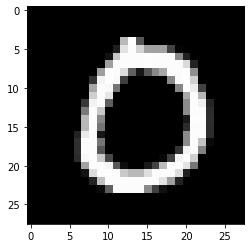

In [64]:
# for i in range(10):
import random
k = random.randint(0, x_valid.shape[0])
pyplot.imshow(x_valid[k].numpy().reshape(28,28),cmap='gray')
print(y_valid[k].numpy())    
ans = torch.argmax(model(torch.tensor(x_valid[k])))
print('precit = ', ans.numpy())